<a href="https://colab.research.google.com/github/LizcanoJuan1010/BNB-CRYTO-/blob/main/BNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplfinance
import pandas_datareader as pdr
from datetime import datetime, timedelta
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
init_date = datetime.now() - timedelta(days=1825)
end_date = datetime.now()

In [3]:
import yfinance as yf

ticker = "BNB-USD"  # Símbolo de la acción

# Obtiene datos sobre la acción
data = yf.download(ticker)

# Obtiene el precio de cierre más reciente
last_price = data["Close"][-1]

print(f"El precio de cierre de {ticker} es de ${last_price:.2f}")


[*********************100%%**********************]  1 of 1 completed

El precio de cierre de BNB-USD es de $514.53


In [6]:
print(data.head())

               Open     High      Low    Close  Adj Close    Volume
Date                                                               
2017-11-09  2.05314  2.17423  1.89394  1.99077    1.99077  19192200
2017-11-10  2.00773  2.06947  1.64478  1.79684    1.79684  11155000
2017-11-11  1.78628  1.91775  1.61429  1.67047    1.67047   8178150
2017-11-12  1.66889  1.67280  1.46256  1.51969    1.51969  15298700
2017-11-13  1.52601  1.73502  1.51760  1.68662    1.68662  12238800


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


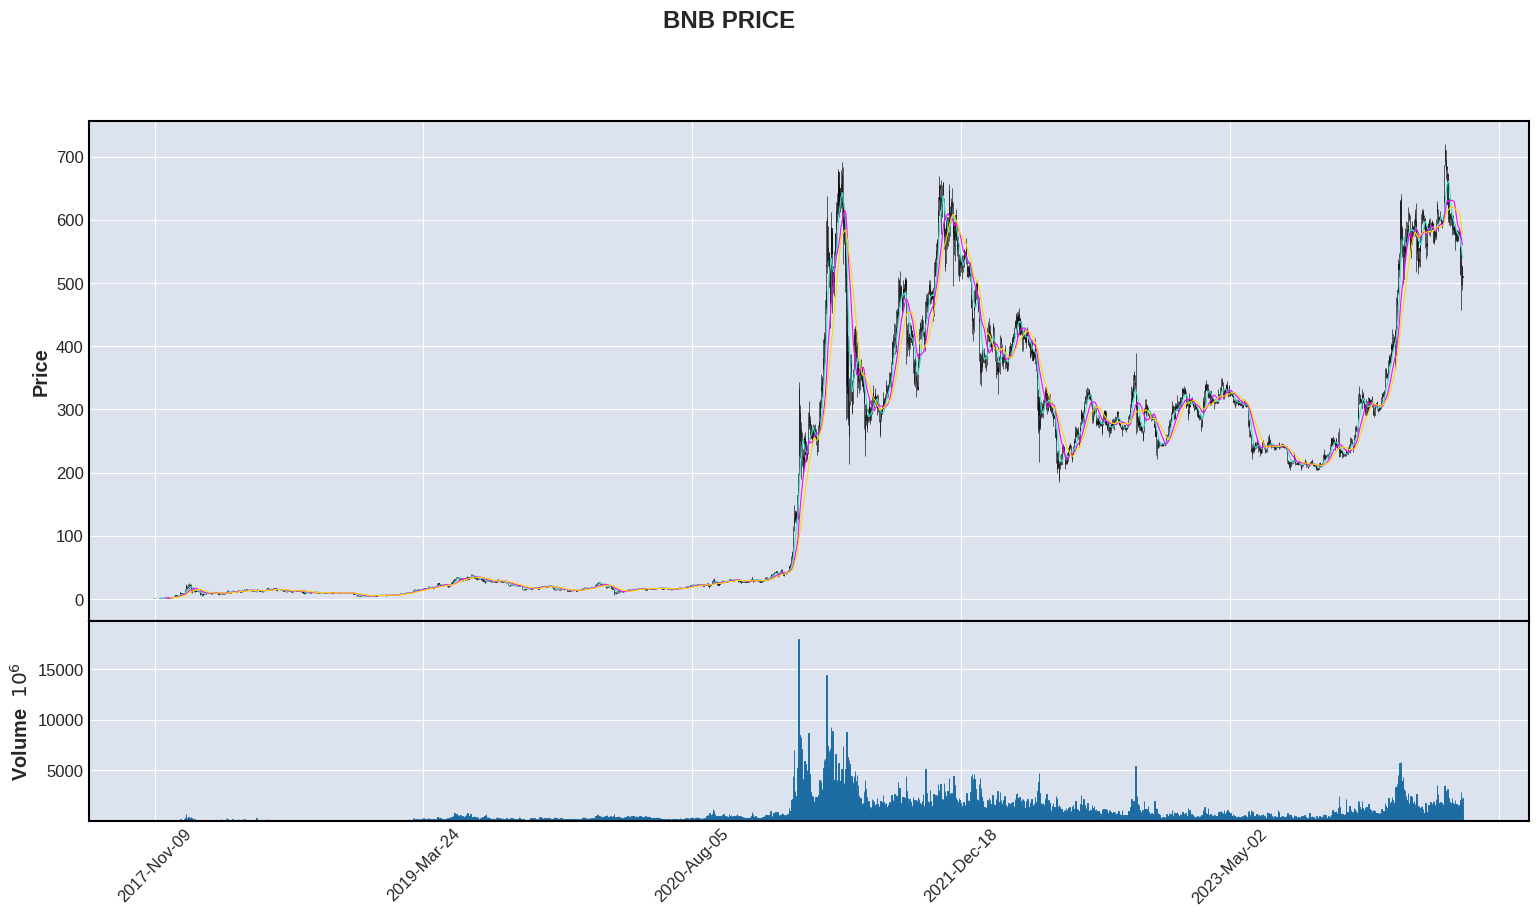

In [57]:
mpf.plot(data, type='candle', title='BNB PRICE', figsize=(20, 10),volume=True,mav=(10,20,30))
plt.show()

[*********************100%%**********************]  1 of 1 completed


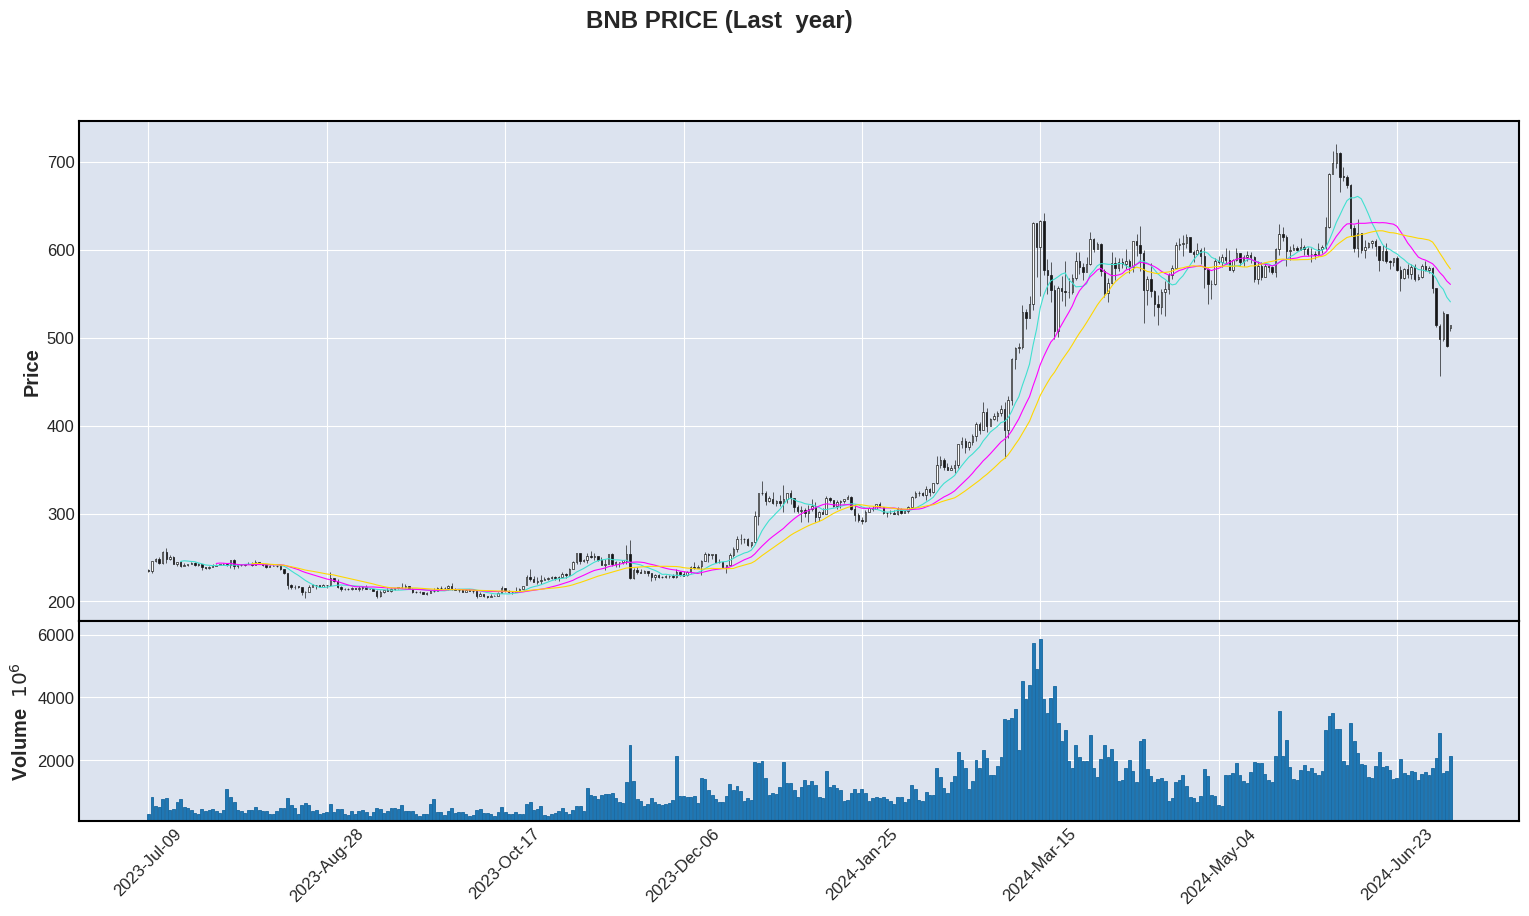

In [4]:
data1y = yf.download(ticker, period="1y")
mpf.plot(data1y, type='candle', title='BNB PRICE (Last  year)', figsize=(20, 10),volume=True,mav=(10,20,30))
plt.show()

[*********************100%%**********************]  1 of 1 completed


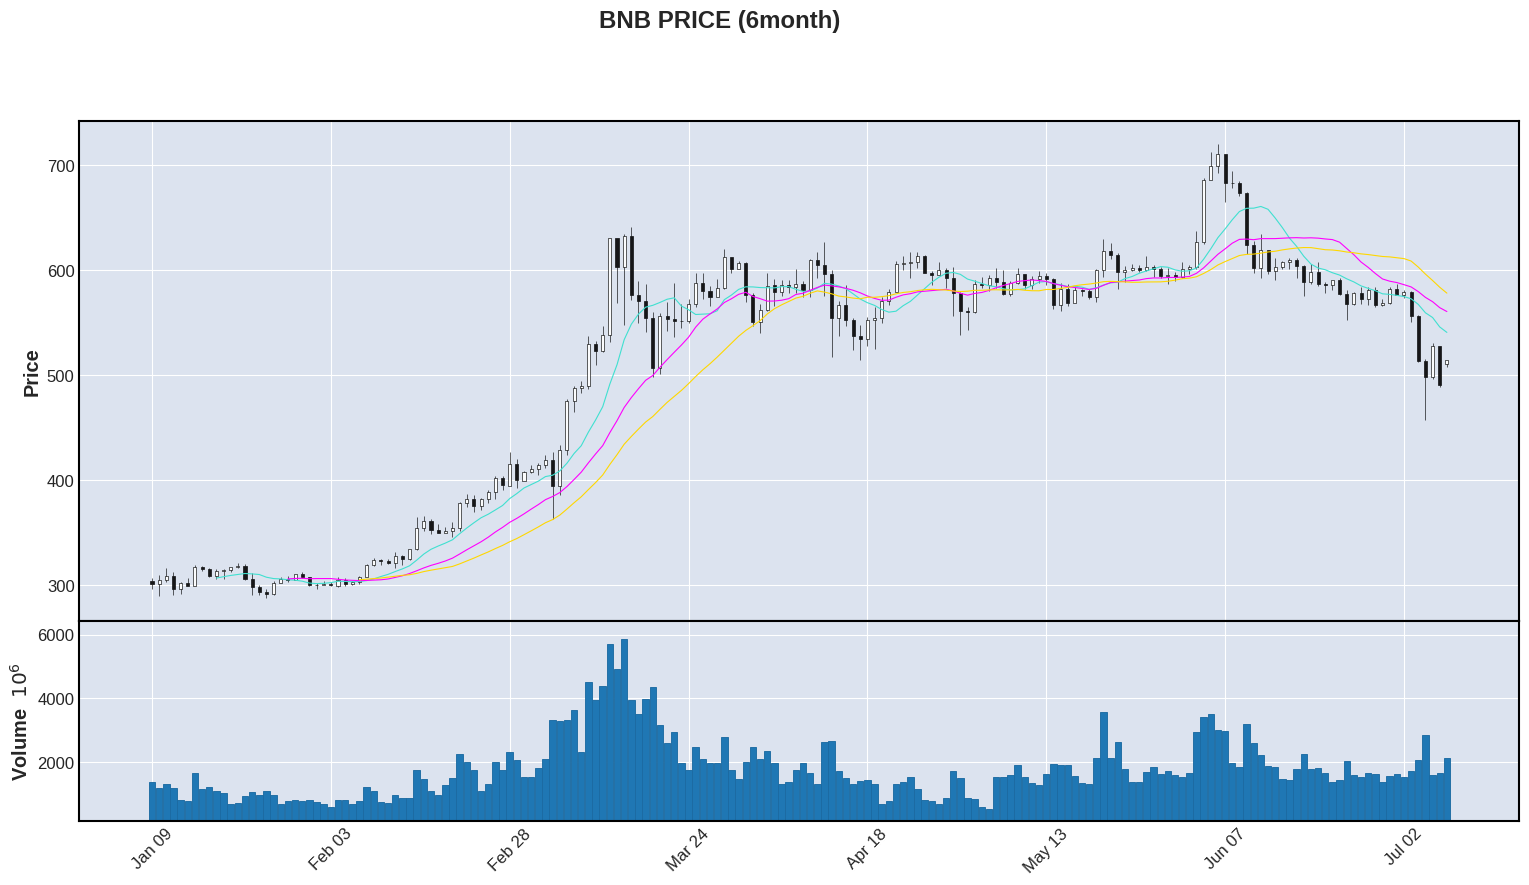

In [5]:
data6m = yf.download(ticker, period="6mo")
mpf.plot(data6m, type='candle', title='BNB PRICE (6month)', figsize=(20, 10),volume=True,mav=(10,20,30))
plt.show()

In [12]:
BNB= yf.Ticker("BNB-USD")
BNB.info

{'twitter': '"https://twitter.com/bnbchain"',
 'name': 'BNB',
 'startDate': 1500940800,
 'description': 'BNB (BNB) is a cryptocurrency . BNB has a current supply of 147,582,667.16132256. The last known price of BNB is 513.80072797 USD and is up 0.67 over the last 24 hours. It is currently trading on 2190 active market(s) with $2,103,368,023.00 traded over the last 24 hours. More information can be found at https://bnbchain.org/en.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 510.54477,
 'open': 510.54477,
 'dayLow': 508.02188,
 'dayHigh': 510.54477,
 'regularMarketPreviousClose': 510.54477,
 'regularMarketOpen': 510.54477,
 'regularMarketDayLow': 508.02188,
 'regularMarketDayHigh': 510.54477,
 'volume': 2267925248,
 'regularMarketVolume': 2267925248,
 'averageVolume': 1721287088,
 'averageVolume10days': 1762411367,
 'averageDailyVolume10Day': 1762411367,
 'marketCap': 74975207424,
 'fiftyTwoWeekLow': 203.65544,
 'fiftyTwoWeekHigh': 720.6726,
 'fiftyDayAverage': 598.43146,
 't

In [20]:
BNB_values = BNB.history(start="2019-01-01",end="2024-07-05")

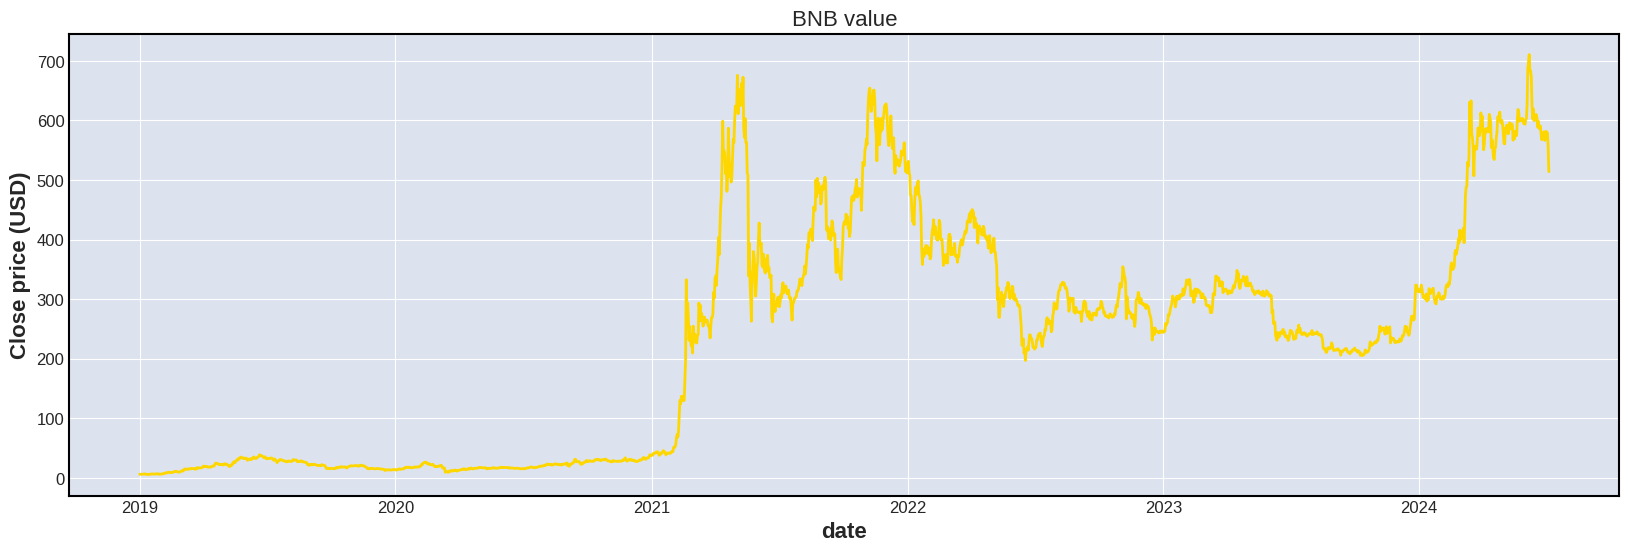

In [22]:
plt.figure(figsize=(20,6))
plt.plot(BNB_values.index, BNB_values['Close'], lw=2 , color="gold")
plt.xlabel("date")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (USD)", fontsize=16)
plt.title("BNB value", fontsize=16);

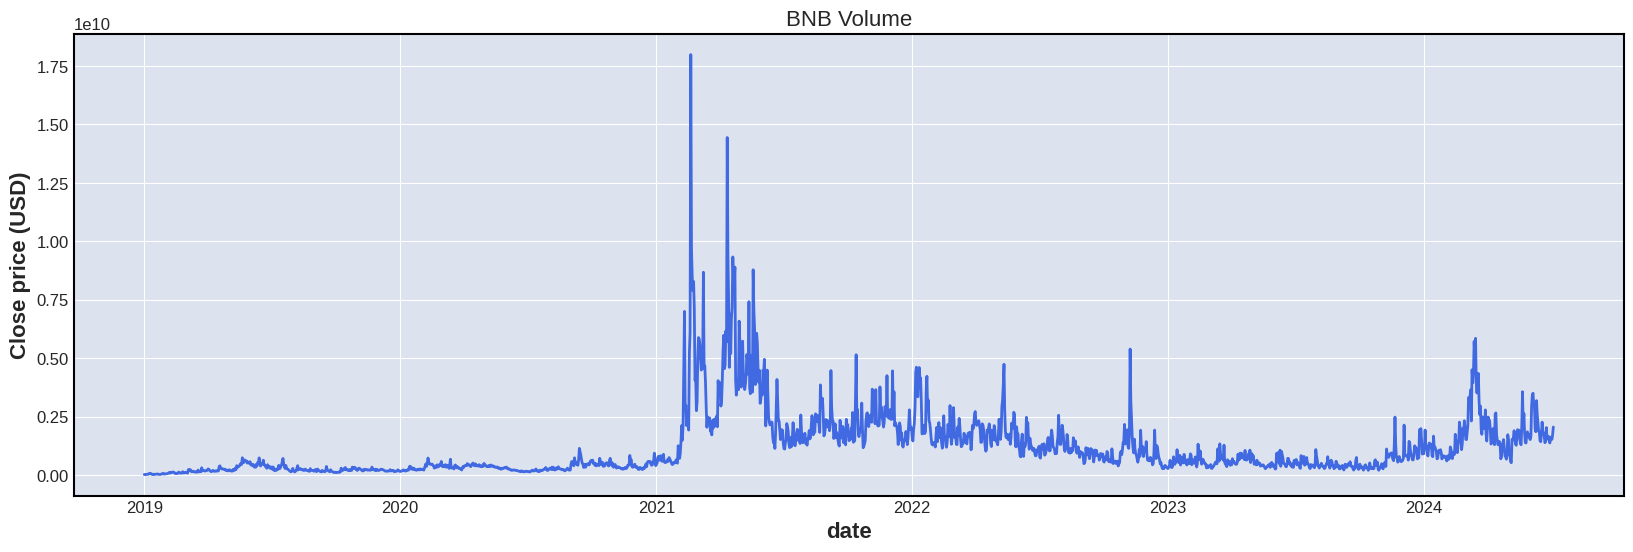

In [41]:
plt.figure(figsize=(20,6))
plt.plot(BNB_values.index, BNB_values['Volume'], lw=2 , color="royalblue")
plt.xlabel("date")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (USD)", fontsize=16)
plt.title("BNB Volume", fontsize=16);

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
BNB_values.index = pd.to_datetime(BNB_values.index)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
BNB_values['Close'] = scaler.fit_transform(BNB_values[['Close']])

In [27]:
BNB_values.index = pd.to_datetime(BNB_values.index).tz_localize(None)

In [28]:
train_data = BNB_values.query('Date <  "2023-06-01"').reset_index(drop = False)
test_data  = BNB_values.query('Date >= "2023-06-01"').reset_index(drop = False)

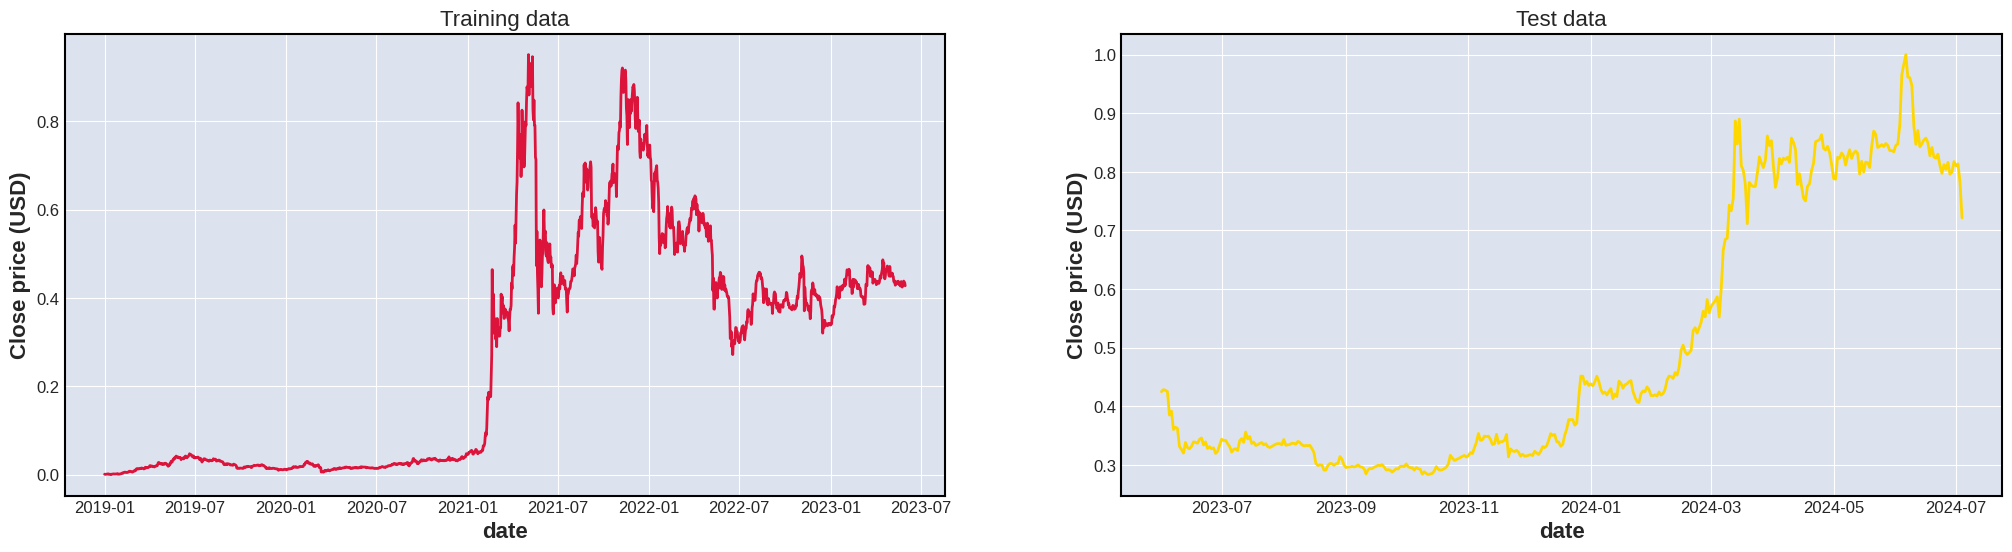

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
ax1.plot(train_data.Date, train_data['Close'],c='crimson', lw=2)
ax1.set_xlabel("date", fontsize=16)
ax1.set_ylabel("Close price (USD)", fontsize=16)
ax1.set_title("Training data", fontsize=16)
ax2.plot(test_data.Date, test_data['Close'], c='gold', lw=2)
ax2.set_xlabel("date", fontsize=16)
ax2.set_ylabel("Close price (USD)", fontsize=16)
ax2.set_title("Test data", fontsize=16);

In [30]:
X_train = train_data.Date
y_train = train_data['Close']

X_test = test_data.Date
y_test = test_data['Close']

n_features = 1

train_series = y_train.values.reshape((len(y_train), n_features))
test_series  = y_test.values.reshape((len(y_test), n_features))

In [31]:
import keras


from keras.preprocessing.sequence import TimeseriesGenerator


look_back = 20

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

n_neurons  = 4
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse');

model.fit(train_generator,epochs=300, verbose=0);

In [32]:
test_predictions  = model.predict(test_generator)

38/38 [==============================] - 1s 4ms/step


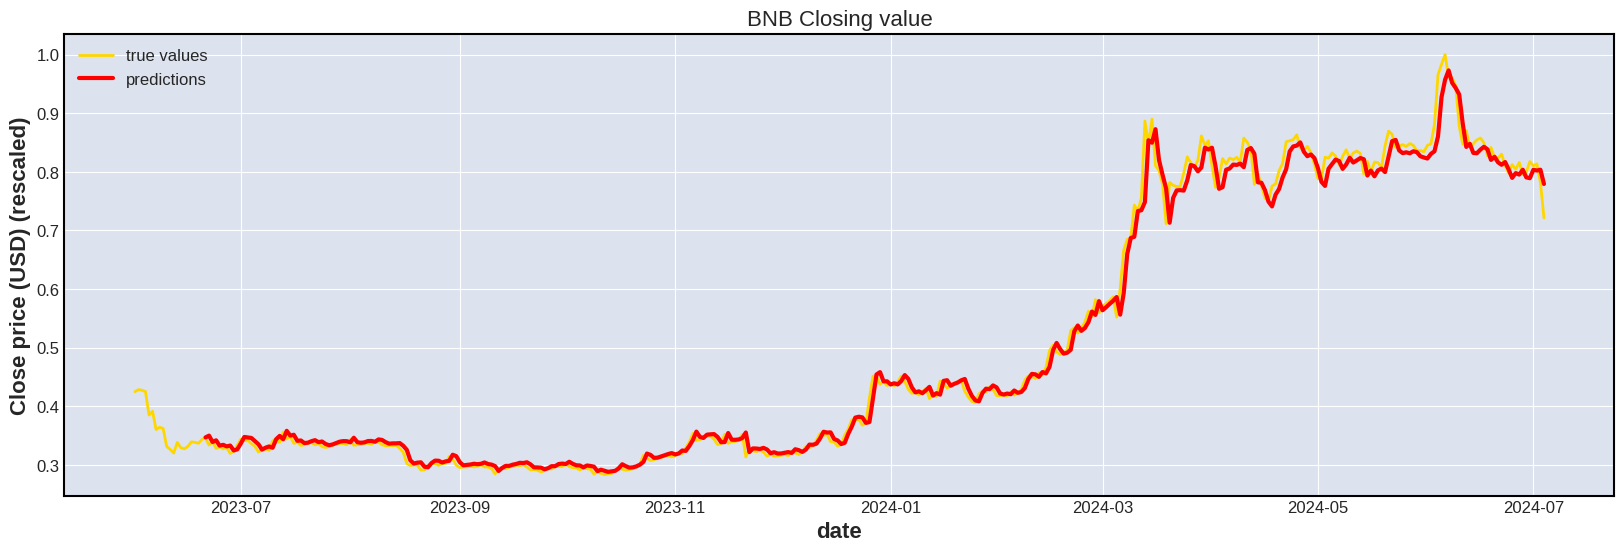

In [47]:
plt.figure(figsize=(20,6))
plt.plot(test_data.Date, test_data['Close'], c='gold',label='true values')
plt.plot(X_test[20:],test_predictions, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="upper left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (USD) (rescaled)", fontsize=16)
plt.title("BNB Closing value", fontsize=16);

In [34]:
test_data['naive'] = test_data['Close'].shift(1)

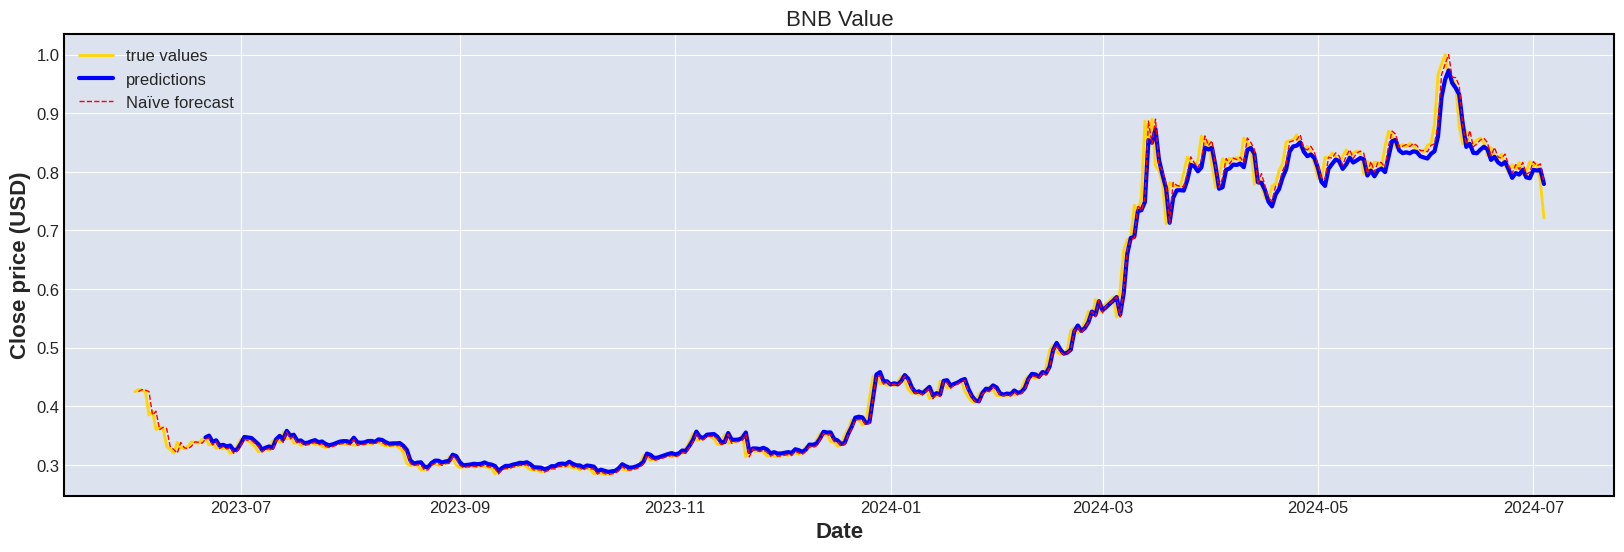

In [60]:
plt.figure(figsize=(20,6))
plt.plot(test_data.Date, test_data['Close'], c='gold',label='true values')
plt.plot(X_test[20:],test_predictions, lw=3, c='b',linestyle = '-', label='predictions')
plt.plot(test_data.Date,test_data['naive'], lw=1, c='r',linestyle = '--', label='Naïve forecast')
plt.legend(loc="upper left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close price (USD)", fontsize=16)
plt.title("BNB Value", fontsize=16);

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


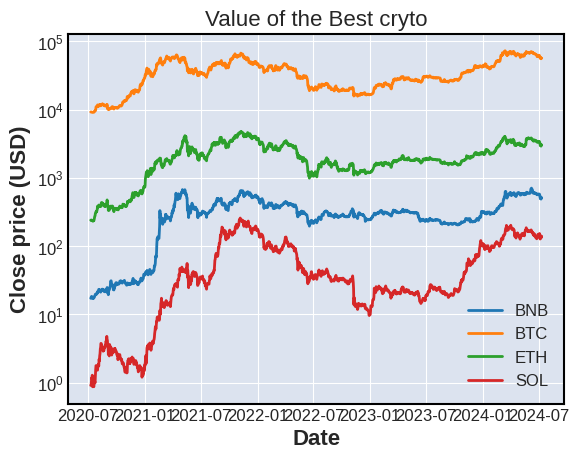

<Figure size 600x2000 with 0 Axes>

In [58]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt

currency = 'USD'
metric = 'Close'
start = dt.datetime.now() - dt.timedelta(days=(365*4))
end = dt.datetime.now()
crypto = ['BNB','BTC','ETH','SOL']
colnames =[]
first =True
for ticker in crypto:
    df = yf.download(f'{ticker}-{currency}', start=start, end=end)
    if first:
        combined = df[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(df[metric])
        colnames.append(ticker)
        combined.columns = colnames
plt.yscale('log')
for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)
plt.legend(loc="lower right")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close price (USD)", fontsize=16)
plt.title("Value of the Best cryto", fontsize=16);
plt.figure(figsize=(6,20))
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


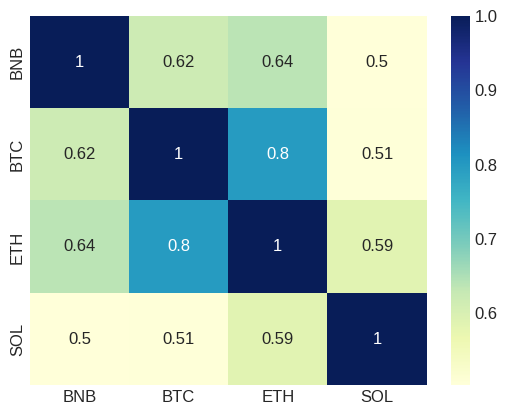

In [50]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt

currency = 'USD'
metric = 'Close'
start = dt.datetime.now() - dt.timedelta(days=(365*4))
end = dt.datetime.now()
crypto = ['BNB','BTC','ETH','SOL']
colnames =[]
first =True
for ticker in crypto:
    df = yf.download(f'{ticker}-{currency}', start=start, end=end)
    if first:
        combined = df[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(df[metric])
        colnames.append(ticker)
        combined.columns = colnames
combined = combined.pct_change().corr(method="pearson")
sns.heatmap(combined, annot=True, cmap="YlGnBu")
plt.show()